# **CMT309 - Computational Data Science - Data Science Portfolio**

22070780


# Part 2 - Statistical Analysis (55 marks)

This question has been created to test your statistical analysis and programming knowledge in Python. 

You are given a `csv` file, which include various data entries for UFC fights played between 1994 up to 2021. Each row presents several statistics for a fighter in a specific fight (`Match_ID`) where the result of the fight is stored in (`Winner`). Descriptions for some other important column names is automatically downloaded in a txt file. 

In this exercise, you are asked to perform a number of operations to:
 - perform statistical analysis of the data, and
 - gain insights from the data.

In [1]:
#We import all the neccessary libraries
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
import arviz as az
#import pymc3 as pm
#from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")
!pip install kaleido
import plotly.express as px
import kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mkl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## P2.0) Suggested/Required Imports

In [4]:
module_url = f"https://drive.google.com/uc?export=view&id=1eZuwv6os65YqO6xwyj6i9ojq3c6yAeCE"
module_url2 = f"https://drive.google.com/uc?export=view&id=1gejV-dCzznzCNCrP6xgBtflWK3sny_ar"
module_name = 'UFC_data.csv'
name2 = 'descriptions.txt'
with request.urlopen(module_url) as f, open(module_name,'w') as outf, request.urlopen(module_url2) as f2, open(name2,'w') as outf2:
  a = f.read()
  outf.write(a.decode('utf-8'))
  a2 = f2.read()
  outf2.write(a2.decode('utf-8'))
df = pd.read_csv('UFC_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'Win_by_KO/TKO':'Win_by_KO_TKO', 'Avg_CTRL_time(seconds)':'Avg_CTRL_time',
                        'Avg_opp_CTRL_time(seconds)':'Avg_opp_CTRL_time', 'Total_time_fought(seconds)':'Total_time_fought'})
df.head(8)#We view the first 8 columns and rows


,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Split,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID
0,Gustavo Lopez,1,20/03/2021,1,0,1,1,0.000000,0.0,0.420000,...,0,0,0,1,0,165.10,170.18,135,31,4347
1,Roman Dolidze,2,20/03/2021,1,0,1,2,0.500000,0.0,0.660000,...,1,0,1,0,0,187.96,193.04,205,32,2867
2,Marcus LeVesseur,3,05/10/2012,2,1,1,3,0.000000,0.0,0.500000,...,0,0,0,0,0,175.26,177.80,155,30,3106
3,Hacran Dias,4,18/05/2013,3,0,1,4,0.000000,0.0,0.430000,...,0,1,0,0,0,172.72,175.26,155,28,3765
4,Daron Cruickshank,5,25/07/2015,4,0,1,3,0.125977,0.0,0.382295,...,1,2,3,0,0,172.72,182.88,155,30,672
5,Paulo Thiago,2,12/06/2010,5,0,1,5,1.125000,0.0,0.382500,...,0,1,1,1,0,180.34,187.96,170,29,3488
6,Cristiane Justino,6,27/07/2019,6,1,1,6,0.093750,1.0,0.427812,...,0,1,4,0,0,172.72,172.72,145,34,2030
7,Ryan Bader,7,19/11/2011,7,1,1,7,0.140625,0.5,0.239063,...,0,3,2,0,0,187.96,187.96,205,28,4281


In [6]:
#Printing the list of columns
list(df)

['Fighter',
 'Referee',
 'Date',
 'Location',
 'Winner',
 'Title_bout',
 'Weight_class',
 'Avg_KD',
 'Avg_opp_KD',
 'Avg_SIG_STR_pct',
 'Avg_opp_SIG_STR_pct',
 'Avg_TD_pct',
 'Avg_opp_TD_pct',
 'Avg_SUB_ATT',
 'Avg_opp_SUB_ATT',
 'Avg_REV',
 'Avg_opp_REV',
 'Avg_SIG_STR_landed',
 'Avg_opp_SIG_STR_landed',
 'Avg_TOTAL_STR_landed',
 'Avg_opp_TOTAL_STR_landed',
 'Avg_TD_landed',
 'Avg_opp_TD_landed',
 'Avg_HEAD_landed',
 'Avg_opp_HEAD_landed',
 'Avg_BODY_landed',
 'Avg_opp_BODY_landed',
 'Avg_LEG_landed',
 'Avg_opp_LEG_landed',
 'Avg_DISTANCE_landed',
 'Avg_opp_DISTANCE_landed',
 'Avg_CLINCH_landed',
 'Avg_opp_CLINCH_landed',
 'Avg_GROUND_landed',
 'Avg_opp_GROUND_landed',
 'Avg_CTRL_time',
 'Avg_opp_CTRL_time',
 'Total_time_fought',
 'Total_rounds_fought',
 'Total_title_bouts',
 'Current_win_streak',
 'Current_lose_streak',
 'Longest_win_streak',
 'Wins',
 'Losses',
 'Draw',
 'Win_by_Decision_Majority',
 'Win_by_Decision_Split',
 'Win_by_Decision_Unanimous',
 'Win_by_KO_TKO',
 'Win_by_Su

## P2.1. – `pandas` for Probability and Visualisation (15 marks) 

### P2.1.1. The Tall, Young and Winner(3 marks)
Find the probability of a fighter winning the fight while *(1) being younger than 25 years of age*, and *(2) taller than 180 cms*. Write a one-liner to solve this. $P\big[\text{Win} | (\text{height_cms} > 180)\cap \text{Age} <25\big]$

In [7]:
# the probability of a fighter winning the fight while (1) being younger than 25 years of age, and (2) taller than 180 cms
df[(df.Height_cms > 180) & (df.Age < 25)&(df.Winner==1)].shape[0]/df[(df.Height_cms > 180) & (df.Age < 25)].shape[0]



0.6138107416879796

In [8]:
df

,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Split,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID
0,Gustavo Lopez,1,20/03/2021,1,0,1,1,0.000000,0.000000,0.420000,...,0,0,0,1,0,165.10,170.18,135,31,4347
1,Roman Dolidze,2,20/03/2021,1,0,1,2,0.500000,0.000000,0.660000,...,1,0,1,0,0,187.96,193.04,205,32,2867
2,Marcus LeVesseur,3,05/10/2012,2,1,1,3,0.000000,0.000000,0.500000,...,0,0,0,0,0,175.26,177.80,155,30,3106
3,Hacran Dias,4,18/05/2013,3,0,1,4,0.000000,0.000000,0.430000,...,0,1,0,0,0,172.72,175.26,155,28,3765
4,Daron Cruickshank,5,25/07/2015,4,0,1,3,0.125977,0.000000,0.382295,...,1,2,3,0,0,172.72,182.88,155,30,672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9168,Quinton Jackson,6,27/12/2008,1,1,1,7,1.000000,0.000000,0.518750,...,0,1,2,0,0,185.42,185.42,205,30,1644
9169,Kyoji Horiguchi,20,19/11/2016,65,1,1,12,1.031250,0.000000,0.436250,...,0,4,2,0,0,165.10,167.64,125,26,5816
9170,Daniel Kelly,2,26/11/2016,23,1,1,2,0.000000,0.125000,0.423750,...,0,2,1,1,0,182.88,177.80,185,39,5584
9171,Misha Cirkunov,6,14/09/2019,5,1,1,7,0.000000,0.562500,0.523125,...,0,0,1,4,0,190.50,195.58,205,32,542


###P2.1.2. The most durable fighters (3 marks)
Find the most durable fighters among all the fighters in the dataframe. You need to filter out `df` for the **10 most** durable fighters who **wins** where they **received higher than 100 significant strikes 'landed'**, but **not had any knockdowns (KD)**.    

In [9]:
# Displaying the 10 most durable fighters who wins where they received higher than 100 significant strikes 'landed', but not had any knockdowns (KD).
df[(df.Avg_SIG_STR_landed > 100) & (df.Avg_KD ==0)].sort_values(by=['Wins'], ascending=False).iloc[:10]


,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Split,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID
4275,Aljamain Sterling,1,06/06/2020,1,1,1,1,0.0,0.070312,0.504248,...,0,6,1,3,0,170.18,180.34,135,30,5608
5841,Court McGee,2,14/12/2013,19,0,1,5,0.0,0.046875,0.349531,...,1,2,0,2,0,180.34,190.50,170,29,1679
1983,Karolina Kowalkiewicz,15,08/09/2018,14,0,1,10,0.0,0.000000,0.412500,...,2,3,0,0,0,160.02,162.56,115,32,4209
1706,Court McGee,2,28/08/2013,96,1,1,5,0.0,0.093750,0.419063,...,0,2,0,2,0,180.34,190.50,170,28,3790
780,Yan Xiaonan,83,22/02/2020,55,1,1,10,0.0,0.000000,0.392500,...,0,4,0,0,0,165.10,160.02,115,30,176
7521,Yan Xiaonan,5,08/06/2019,4,1,1,10,0.0,0.000000,0.415000,...,0,3,0,0,0,165.10,160.02,115,29,891
4659,Irene Aldana,12,11/05/2019,64,1,1,8,0.0,0.125000,0.458750,...,1,1,0,0,0,175.26,172.72,135,31,5517
5675,Sabina Mazo,21,12/09/2020,1,1,1,11,0.0,0.000000,0.447500,...,1,1,0,0,0,170.18,177.80,135,23,576
7091,Sean O'Malley,17,07/03/2020,1,1,1,1,0.0,0.000000,0.555000,...,0,2,0,0,0,180.34,182.88,135,25,5494
7292,Sarah Kaufman,17,19/12/2015,79,0,1,8,0.0,0.000000,0.485000,...,0,1,0,0,0,165.10,167.64,135,30,2985


###P2.1.3. KO-Machines (3 marks)
Find probability of fighters who has **at least 2 KO/TKOs** ,and whose **win by KO/TKO ratio is higher than 0.75**.

In [10]:
#We find the probablity of fighters who have at least 2 KO/TKOs and whose win by KO/TKO ratio ius higher than 0.75
df[(df.Win_by_KO_TKO > 2) & (df.Win_by_KO_TKO/df.Wins > 0.75)].shape[0]/df.shape[0]

0.031832552054943855

In [11]:
df[df['Winner']==1]

,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Split,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID
2,Marcus LeVesseur,3,05/10/2012,2,1,1,3,0.000000,0.0000,0.500000,...,0,0,0,0,0,175.26,177.80,155,30,3106
6,Cristiane Justino,6,27/07/2019,6,1,1,6,0.093750,1.0000,0.427812,...,0,1,4,0,0,172.72,172.72,145,34,2030
7,Ryan Bader,7,19/11/2011,7,1,1,7,0.140625,0.5000,0.239063,...,0,3,2,0,0,187.96,187.96,205,28,4281
8,Macy Chiasson,8,20/03/2021,1,1,1,8,0.125000,0.0000,0.535625,...,0,1,2,1,0,180.34,182.88,135,29,1771
9,Grant Dawson,1,20/03/2021,1,1,1,3,0.000000,0.0000,0.515000,...,0,2,0,2,0,177.80,182.88,145,27,2466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Quinton Jackson,21,25/04/2015,37,1,1,13,0.039062,0.5000,0.351440,...,1,3,3,0,0,185.42,185.42,205,36,1832
9168,Quinton Jackson,6,27/12/2008,1,1,1,7,1.000000,0.0000,0.518750,...,0,1,2,0,0,185.42,185.42,205,30,1644
9169,Kyoji Horiguchi,20,19/11/2016,65,1,1,12,1.031250,0.0000,0.436250,...,0,4,2,0,0,165.10,167.64,125,26,5816
9170,Daniel Kelly,2,26/11/2016,23,1,1,2,0.000000,0.1250,0.423750,...,0,2,1,1,0,182.88,177.80,185,39,5584


### P2.1.4 - Ideal Body & Strategy (6 marks)
Create a figure with two subplots by using a filtered-out version of the dataframe `df` including only rows of **WINNERS**.  
- Subplot 1: Create a **2D histogram** via hexagonal bins for `'Height_cms'` and `'Weight_lbs'` columns of the data frame. Color corresponds to number of winners for each height-weight pair.
- Subplot 2: Create a heatmap figure for plotting correlations between columns of `['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed' 'Avg_TD_landed', 'Avg_HEAD_landed', 'Avg_BODY_landed', 'Avg_LEG_landed' 'Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_CTRL_time']`

**In order to solve this question, you need to use either `pandas` or `matplotlib` library visualisation commands. You cannot use `seaborn, plotly` or other libraries for this question.**

**You do not have to replicate the figures given below, but axes labels, titles and other visualisation details should be there.**

![](https://drive.google.com/uc?export=view&id=1aGAk4_6KMcOjWmSWhqYlqmkDGJAY8sR8)

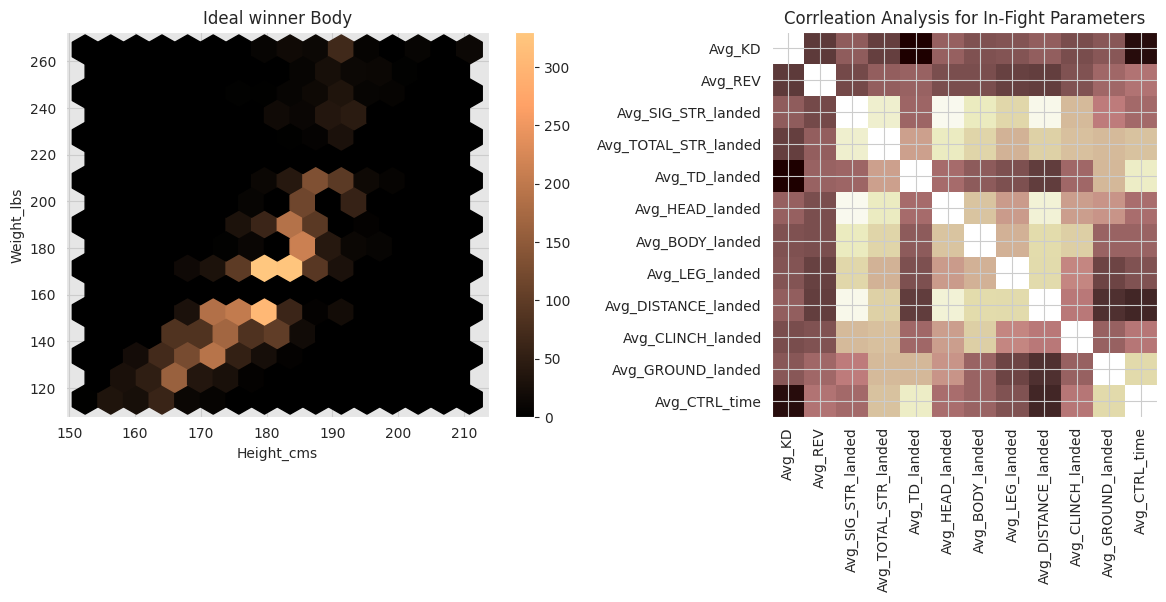

In [12]:
#Hexagonal binning

'''Definition: To Create a figure with two subplots by using a filtered-out version of the dataframe df including only rows of WINNERS.
   
   Inputs: First we have to create a 2D histogram using 'Height_cms' and 'Weight_lbs' columns of the data frame
           Second we have to create a heatmap figure for plotting correlations between various columns
   
   Outputs: We plot a 2D histogram and a heatmap and get the desired output.'''

df_winner = df[df['Winner'] == 1]
fig1 , (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sp1 = ax1.hexbin(df_winner['Height_cms'], df_winner['Weight_lbs'],gridsize=15, cmap='copper')
fig1.colorbar(sp1, ax = ax1, location = 'right')
ax1.set_xlabel('Height_cms')
ax1.set_ylabel('Weight_lbs')
ax1.set_title('Ideal winner Body')
#heatmap correlation
df_heatmap = df_winner[['Avg_KD','Avg_REV','Avg_SIG_STR_landed','Avg_TOTAL_STR_landed','Avg_TD_landed','Avg_HEAD_landed','Avg_BODY_landed','Avg_LEG_landed',
                        'Avg_DISTANCE_landed','Avg_CLINCH_landed','Avg_GROUND_landed','Avg_CTRL_time']]
corr_mat = df_heatmap.corr()
ax2.imshow(corr_mat, cmap='pink')
ax2.set_xticks(np.arange(len(df_heatmap.columns)))
ax2.set_yticks(np.arange(len(df_heatmap.columns)))
ax2.set_xticklabels(df_heatmap.columns, rotation = 90)
ax2.set_yticklabels(df_heatmap.columns)
ax2.set_title('Corrleation Analysis for In-Fight Parameters')
plt.show()

##P2.2. – Variable selection via linear regression analysis (9 marks)

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a list of variables includes columns of the data frame except for `'Fighter',	'Referee',	'Date'` and `Match_ID`.
 - `main_target` is the variable for the regression, `'Winner'` 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is a list which stores the selected subset of initial `main_pred`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - **Stage 1 (adding predictors):** you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - **Stage 2 (removing non-significant predictors)**: if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [13]:
'''Definition: We perform variable selection and create a function select_variable(df, main_pred, main_target, alpha)

    Inputs:    main_pred is a list of variables includes columns of the data frame except for 'Fighter', 'Referee', 'Date' and Match_ID.
               main_target is the variable for the regression, 'Winner'
               alpha is the significance level for selecting significant predictors

    Outputs:   main_pred is a list which stores the selected subset of initial main_pred'''        

def select_variable(df, main_pred, main_target, alpha):
  temp_pred = main_pred
  rsq_dict = {}
  temp_col = ''
  formula_root = f'{main_target} ~ '
  rsq = 0
  sign_pred = []
  for i in range(0, len(main_pred)):
     rsq_dict = {}
     for col in temp_pred:
       formula = formula_root + col
       rsq_adj = sm.OLS.from_formula(formula, df).fit().rsquared_adj
       rsq_dict.update({col : rsq_adj})
     rsq_key,rsq_value = max(rsq_dict.items(), key=lambda x: x[1])
     if rsq_value > rsq:
       formula_root += f'{rsq_key} + '
       print(i,formula_root, rsq_value)
       rsq = rsq_value
       sign_pred.append(rsq_key)
     else:
       print(f'{i} - NON SIGN {rsq_value}')
     temp_pred.remove(rsq_key)
  
  
  stage2_pred = sign_pred
  len_s2 = len(stage2_pred)
  for i in range(0,len_s2):
    formula = 'Winner ~ ' + '+'.join(stage2_pred)
    model = sm.OLS.from_formula(formula, df).fit()
    pvalue_dict = model.pvalues.to_dict()
    pvalue_dict.pop('Intercept')
    max_key, max_value = max(pvalue_dict.items(), key=lambda x: x[1])
    if max_value > alpha:
      print(i, max_key,max_value,formula,model.rsquared_adj)
      stage2_pred.remove(max_key)
    else:
      print(i, 'NON SIGN')
  print(stage2_pred)
  return stage2_pred



In [14]:
# define input arguments of the function before and then run the code below
main_pred = [col for col in df.columns if col not in ['Fighter','Referee','Date','Match_ID','Winner']]
main_target = 'Winner'
alpha = 0.05
main_pred = select_variable(df, main_pred, main_target, alpha)
main_pred

0 Winner ~ Age +  0.01317681788931413
1 Winner ~ Age + Avg_opp_SIG_STR_pct +  0.016056366489210716
2 Winner ~ Age + Avg_opp_SIG_STR_pct + Avg_GROUND_landed +  0.01829572040630112
3 Winner ~ Age + Avg_opp_SIG_STR_pct + Avg_GROUND_landed + Win_by_Decision_Split +  0.02031567540522361
4 Winner ~ Age + Avg_opp_SIG_STR_pct + Avg_GROUND_landed + Win_by_Decision_Split + Longest_win_streak +  0.022206865995026637
5 Winner ~ Age + Avg_opp_SIG_STR_pct + Avg_GROUND_landed + Win_by_Decision_Split + Longest_win_streak + Reach_cms +  0.023112725218940366
6 Winner ~ Age + Avg_opp_SIG_STR_pct + Avg_GROUND_landed + Win_by_Decision_Split + Longest_win_streak + Reach_cms + Avg_TD_landed +  0.024122278646285578
7 Winner ~ Age + Avg_opp_SIG_STR_pct + Avg_GROUND_landed + Win_by_Decision_Split + Longest_win_streak + Reach_cms + Avg_TD_landed + Title_bout +  0.024817470087255544
8 Winner ~ Age + Avg_opp_SIG_STR_pct + Avg_GROUND_landed + Win_by_Decision_Split + Longest_win_streak + Reach_cms + Avg_TD_landed + 

['Age',
 'Avg_opp_SIG_STR_pct',
 'Win_by_Decision_Split',
 'Reach_cms',
 'Avg_TD_landed',
 'Title_bout',
 'Total_title_bouts',
 'Avg_SIG_STR_pct',
 'Total_time_fought',
 'Avg_REV',
 'Avg_opp_SIG_STR_landed',
 'Avg_opp_CTRL_time',
 'Avg_opp_TD_landed',
 'Avg_HEAD_landed',
 'Avg_TOTAL_STR_landed']

## P2.3 - Regression Analysis (15 marks)

In this part of the statistical analysis, you are asked to develop various regression models for predicting the winning probability of a fighter using the significant predictors found in P2.2. 

You are asked to write a function `regression_models_UFC(df, main_pred, main_target)` that takes the data frame `df`, significant predictors `main_pred` and target `main_target` as its arguments, and

- splits the data into training and test samples with 1:1 ratio. 
- fits **Linear, Logistic, Poisson** and **Bayesian regression models** using the training samples, and then predicts winning probabilities using the test samples.

`regression_models_UFC()` returns a single object `results` which is a `tuple` of `tuples` each element of which is: 
 - `sm.` model objects for each regression model `(lin_reg, logit_reg, poisson_reg, bayes_reg)`
 - predicted probabilities for each model --> `(y_lin, y_logit, y_poisson, y_bayes)`
 - splitted training and test samples --> `(x_train, x_test, y_train, y_test)` 


In [15]:
'''Definition: a function regression_models_UFC(df, main_pred, main_target) 
               that takes the data frame df, significant predictors main_pred and target main_target as its arguments
               which fits Linear,Logistic and Probit regression models

   Inputs:     main_pred and main_target are the arguments

   Outputs:    regression_models_UFC() returns a single object results which is a tuple of tuples each element of which is:

               sm. model objects for each regression model (lin_reg, logit_reg, poisson_reg, bayes_reg)
               predicted probabilities for each model --> (y_lin, y_logit, y_poisson, y_bayes)
               splitted training and test samples --> (x_train, x_test, y_train, y_test)'''


def regression_models_UFC(df, main_pred, main_target):
 
  # We perform the train test split test
  Train = df.sample(frac=0.7,random_state=42)
  Test = df.drop(Train.index)
  x_train = Train[main_pred]
  y_train = Train[[main_target]]
  x_test = Test[main_pred]
  y_test = Test[main_target]
  # These are the Regression Models
  lin_reg = sm.OLS(y_train, x_train).fit()
  logit_reg = sm.Logit(y_train,x_train).fit()
  probit_reg = sm.Probit(y_train, x_train).fit()
  #We are Predicting the Probabilities
  y_lin = lin_reg.predict(x_test)
  y_logit = logit_reg.predict(x_test)
  y_probit = probit_reg.predict(x_test)
  # Convert Predict probablity to integer
  # We then pack it in tuples and return it
  model_tup = (lin_reg,logit_reg,probit_reg)
  pred_tup = (y_lin,y_logit,y_probit)
  sample_tup = (x_train,x_test,y_train,y_test)
  return (model_tup,pred_tup,sample_tup)


In [17]:
# define input arguments of the function before and then run the code below
# The Optimization occurs successfully and we print to see the result
results = regression_models_UFC(df, main_pred, main_target)
print(results[1])

Optimization terminated successfully.
         Current function value: 0.677793
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677782
         Iterations 4
(1       0.583308
2       0.543104
4       0.486689
5       0.577655
9       0.585609
          ...   
9159    0.446338
9160    0.604506
9161    0.523780
9167    0.474012
9170    0.407084
Length: 2752, dtype: float64, 1       0.562463
2       0.571719
4       0.491474
5       0.581029
9       0.593384
          ...   
9159    0.462187
9160    0.597058
9161    0.514120
9167    0.465916
9170    0.400445
Length: 2752, dtype: float64, 1       0.562162
2       0.571411
4       0.491480
5       0.580629
9       0.593167
          ...   
9159    0.462384
9160    0.596775
9161    0.513953
9167    0.465974
9170    0.400609
Length: 2752, dtype: float64)


## P2.4 – Data Analytics, performance and visualisation (16 marks)

### P2.4.1 - In-Fight Winning Analysis (5 marks)
Assume you are the data analyist of an UFC fighter. You have developed a Logistic regression model above and is going to use this to make an in-Fight analysis. 

During the round 4, you are creating a function `in_fight_analysis(results)`. This function is going to take as input the output of `regression_models_UFC()` function will give you some data analysis insights for the last round of the fights. The function `in_fight_analysis(results)` will
 - randomly select a fighter from the test data. (Hint: select a row, not a fighter!) Assume that this is your fighter!
 - analyse two parameters of: `'Avg_HEAD_landed'` and `Avg_opp_CTRL_time`. (Hint: These two parameters are two of the significant predictors. If your `select_variable()` function does not return these two, you are doing something wrong.)
 - create a `seaborn` heatmap figure that depicts how changes on the two paramters mentioned above affects winning probablity of your fighter.

For both of the variables, your arrays will start from your fighter's existing values, and you are going to check changes up to two times higher from those values.

Winning probabilities will be predicted by using the Logistic regression model developed in P2.3.

![](https://drive.google.com/uc?export=view&id=1jyl53cNpU-TEhxtSWBKzfkV39wotO-M4)

In [19]:
''' Definition: We define in_fight_analysis.This function is going to take 
                as input the output of regression_models_UFC() function will
                give you some data analysis insights for the last round of the fights

    Inputs:     Take results as the argument and analyse two parameters of: 'Avg_HEAD_landed' and Avg_opp_CTRL_time

    Outputs:    To create a seaborn heatmap figure that depicts how changes
                on the two paramters mentioned above affects winning probablity of your fighter.'''
                
def in_fight_analysis(results):
    reg_models,reg_pred,reg_ds = results # unpack results
    log_reg = reg_models[1]
    # read the x_train.....y_train
    x_train,x_test,y_train,y_test = reg_ds
    # random sample for test data 
    random_sample_x = x_test.sample(n=1, random_state = 42) 
    random_sample_y = y_test.sample(n=1, random_state = 42)
    head_initial = random_sample_x['Avg_HEAD_landed']
    ctrl_initial = random_sample_x['Avg_opp_CTRL_time']
    arr_head = np.linspace(head_initial, head_initial * 2, 10, dtype=np.float16).T.flatten()
    arr_ctrl = np.linspace(ctrl_initial, ctrl_initial * 2, 10, dtype=np.float16).T.flatten()
    arr_head_grid, arr_ctrl_grid = np.meshgrid(arr_head, arr_ctrl)
    arr_head =  arr_head_grid.ravel()
    arr_ctrl = arr_ctrl_grid.ravel()

    rows = []
    for i in range(100):
      row = random_sample_x.iloc[0].to_dict()
      row['Avg_HEAD_landed'] = arr_head[i]
      row['Avg_opp_CTRL_time'] = arr_ctrl[i]
      rows.append(row)
    df_temp = pd.DataFrame(rows)

    log_pred = log_reg.predict(df_temp)
    df_temp['Win_Prob'] = log_pred
    piv_table = df_temp.pivot_table(values='Win_Prob', index='Avg_HEAD_landed', columns='Avg_opp_CTRL_time')
    ax = sns.heatmap(piv_table, cmap='BuPu', fmt='.2g', cbar_kws={"label": "Winning Probability"})
    ax.set_xlabel('Avg Control Time of the Opponent')
    ax.set_ylabel('Avg Strikes to Head')
    ax.set_title('In-Fight Winning Analysis')
    return 1


1

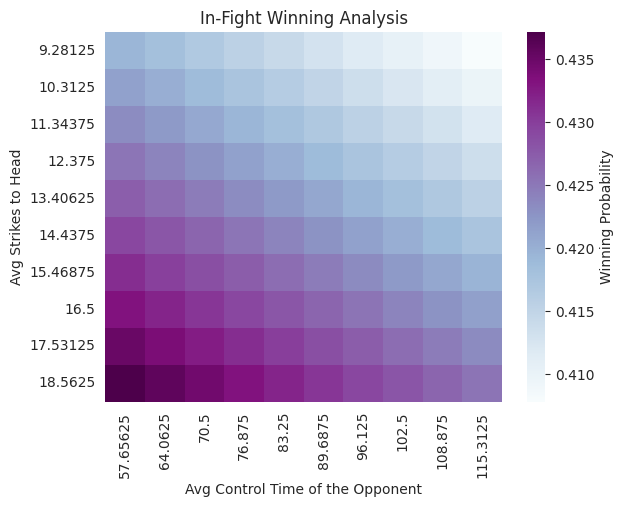

In [21]:
#We display the heatmap 
probablity_of_win = in_fight_analysis(results)
probablity_of_win

### P2.4.2 - Height-Reach Analysis (5 Marks)
Write a function `height_reach_analysis(df, results)` in order to analyse the effects of height and reach differences between fighters. You are asked to:

- take the dataframe `df` and regression modelling output object `results`.
- calculate height and reach differences for each specific fight.
  - A unique `'Match_ID'` corresponds to two different rows in `df`, e.g. the winner and the loser. 
  - For each pair you need to find the difference between columns and create two new columns with these values: `'dHeight'` and `'dReach'`. 
  - If fighter's values are higher, the specific difference value will be positive, otherwise you should set it to negative values. 
  - An example:
  ```
  	    Fighter	        Winner	   Height_cms	Reach_cms	   dHeight	 dReach   Match_ID
3132	Ray Borg	         1	      162.56	   160.02	     -2.54	   -10.16   975
8947	Jussier Formiga	  0	      165.10	   170.18	      2.54	    10.16   975
  ```
- filter out `df` for the test data and add a new column `'WinProb'` from the input argument `result` belonging to Probit regression.
- plot a scatter plot where `'dHeight'` and `'dReach'` correspond to axes and `'WinProb'` colour details of the plot. You must use `plotly.express` module for this question.

![](https://drive.google.com/uc?export=view&id=1rZFDAqaoIUP_2XAtCisrhgkKyRF7OGSP)

In [22]:
''' Definition: To Write a function height_reach_analysis(df, results)
                in order to analyse the effects of height and reach differences between fighters.
    
    Inputs    : We take the dataframe df and regression modelling output object results

    Outputs   : We calculate the height differences for each specific fight and then
                we plot a scatter plot where 'dHeight' and 'dReach' correspond 
                to axes and 'WinProb' colour details of the plot'''


def height_reach_analysis(df, results):
  df_temp = df
  #vals = df_temp['Match_ID'].value_counts()
  #print(len(vals[vals == 1]),3890 * 2, 1393+ 7780 == len(df_temp))
  df_temp = df_temp[df_temp.duplicated(subset=['Match_ID'], keep=False)]    # remove the rows that have one match id entry 
  
  def calc_difference(row):
    match_id = row['Match_ID']
    idx =  row.name
    df_filter = df_temp[df_temp['Match_ID'] == match_id][['Height_cms', 'Reach_cms']]
    max_idx_h = df_filter['Height_cms'].idxmax()
    max_idx_r = df_filter['Reach_cms'].idxmax()
    df_height = df_filter.sort_values(by='Height_cms', ascending= False) # optimize this garbage
    df_reach = df_filter.sort_values(by='Reach_cms', ascending= False)

    diff_h = df_height.iloc[0]['Height_cms'] - df_height.iloc[1]['Height_cms']
    if diff_h != 0.0:
        diff_h = +diff_h if idx == max_idx_h else -diff_h
    diff_r = df_reach.iloc[0]['Reach_cms'] - df_reach.iloc[1]['Reach_cms']
    if diff_r != 0.0:
        diff_r = +diff_r if idx == max_idx_r else -diff_r
    row['dHeight'] = diff_h
    row['dReach'] = diff_r
    return row
  
  df_temp = df_temp.apply(calc_difference, axis = 1)
  pred_prob = results[1][2]
  filter_prob = pred_prob[pred_prob.index.isin(df_temp.index)] 
  df_filter = df_temp.loc[filter_prob.index]
  df_filter.loc[:,'WinProb'] = filter_prob
  fig = px.scatter(df_filter, x='dHeight', y = 'dReach', 
            width = 700,height = 500,
            size = 'Height_cms', color = 'WinProb',
            labels={
                      "dReach": "Reach Difference [cm]",
                      "dHeight": "Height Difference [cm]",
                      "WinProb": "Winning Probability [Probit]"
                  },
            title = 'Height - Reach Analysis')
  fig.show()

In [23]:
height_reach_analysis(df, results)

### 2.4.3 - Prediction Perfomance (6 marks)
You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy (Acc%), mean square error (MSE) and area under curve (AUC) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - predictions from each model, stored in `model_predictions`.
 - The ground-truth values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - Winner_i)^2$$

In order to obtain the prediction accuracy for each model, you need to use `sklearn` module and its `accuracy_score()` function. Similarly, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | Linear      |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | Logistic    |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | Probit      |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
|  3 | Bayesian    |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, the `prediction_perf()` function should `print` and `return` the data frame `df_results`.

In [24]:
from sklearn.metrics import mean_squared_error,roc_auc_score
'''Definition: We create a function prediction_perf(gt, MLE_model_predictions)
               which evaluates the prediction performance of the reference models

    Inputs:    We take gt and model_predictions as the parameters

    Outputs:   We calculate the accuracy score,roc curve and the MSE for linear,
               logical and probit'''
                          
def prediction_perf(gt, model_predictions):
    y_lin,y_logit,y_probit = model_predictions
    #Convert Predict prob to int
    y_lin = (y_lin >= np.mean(y_lin)).astype("int")
    y_logit = (y_logit >= np.mean(y_logit)).astype("int")
    y_probit = (y_probit >= np.mean(y_probit)).astype("int")
    lin_mse = mean_squared_error(gt,y_lin)
    log_mse = mean_squared_error(gt,y_logit)
    pro_mse = mean_squared_error(gt,y_probit)
#Accuracy scores 
    lin_acc = accuracy_score(gt,y_lin)
    log_acc = accuracy_score(gt,y_logit)
    prob_acc = accuracy_score(gt,y_probit)
#ROC_AUC curves
    lin_auc = roc_auc_score(gt,y_lin)
    log_auc = roc_auc_score(gt,y_logit)
    prob_auc = roc_auc_score(gt,y_probit)

    print(lin_mse,log_mse,pro_mse)
    print(lin_acc,log_acc,prob_acc)
    print(lin_auc,log_auc,prob_auc)
  
   

    

df_results = prediction_perf(results[2][3], results[1])

0.4160610465116279 0.41569767441860467 0.4167877906976744
0.5839389534883721 0.5843023255813954 0.5832122093023255
0.583938953488372 0.5843023255813953 0.5832122093023255
